## Observations and Insights 

1. The amount of Capomulin and Ramicane was given out to more mice, than the other regimens. These two regimens provided similar data, as we can see in the box plots, the median lines are within the comparing boxes, telling us the data between them are very similar. 
2. Per the findings in the scatter plot, the weight determined how effective the drug regimen is. The heavier the tumor, the less effective the drug regimen is.
3. Although not significantly higher, the pie chart shows us the male mouse received more treatment than the females. Could this mean that male mice get more tumors than females?

In [78]:
%matplotlib notebook

In [79]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#print(study_results.head())
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [80]:
# Combine the data into a single dataset
main_df = pd.merge(mouse_metadata, study_results, how="outer",on="Mouse ID")

# Display the data table for preview
main_df.head(911)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
906,g867,Stelasyn,Female,9,25,10,48.183402,0
907,g867,Stelasyn,Female,9,25,15,51.060419,1
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0


In [81]:
# Checking the number of mice.
main_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [82]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = main_df[main_df.duplicated()]
print("Duplicate Rows :")
# Optional: Get all the data for the duplicate mouse ID.
duplicate

Duplicate Rows :


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [83]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = pd.DataFrame(main_df)
clean_data_df = main_df.drop_duplicates()
clean_data_df= clean_data_df.rename(columns={"Mouse ID":"mouse_id","Drug Regimen":"drug_regimen","Tumor Volume (mm3)":"tumor_vol_mm3"})
clean_data_df

,mouse_id,drug_regimen,Sex,Age_months,Weight (g),Timepoint,tumor_vol_mm3,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [84]:
# Checking the number of mice in the clean DataFrame.

clean_data_df.count()

mouse_id            1892
drug_regimen        1892
Sex                 1892
Age_months          1892
Weight (g)          1892
Timepoint           1892
tumor_vol_mm3       1892
Metastatic Sites    1892
dtype: int64

## Summary Statistics

In [85]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# Using the aggregation method, produce the same summary statistics in a single line 
# Assemble the resulting series into a single summary dataframe.
summary_stats = clean_data_df.groupby("drug_regimen").tumor_vol_mm3.agg(["mean","median","var","std","sem"])
summary_stats.style.format({'mean': "{:.2f}",'median': "{:.2f}",'var': "{:.2f}","var": "{:.2f}","std": "{:.2f}",'sem': "{:.2f}"})

,mean,median,var,std,sem
drug_regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.37,50.91,42.28,6.50,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

<IPython.core.display.Javascript object>


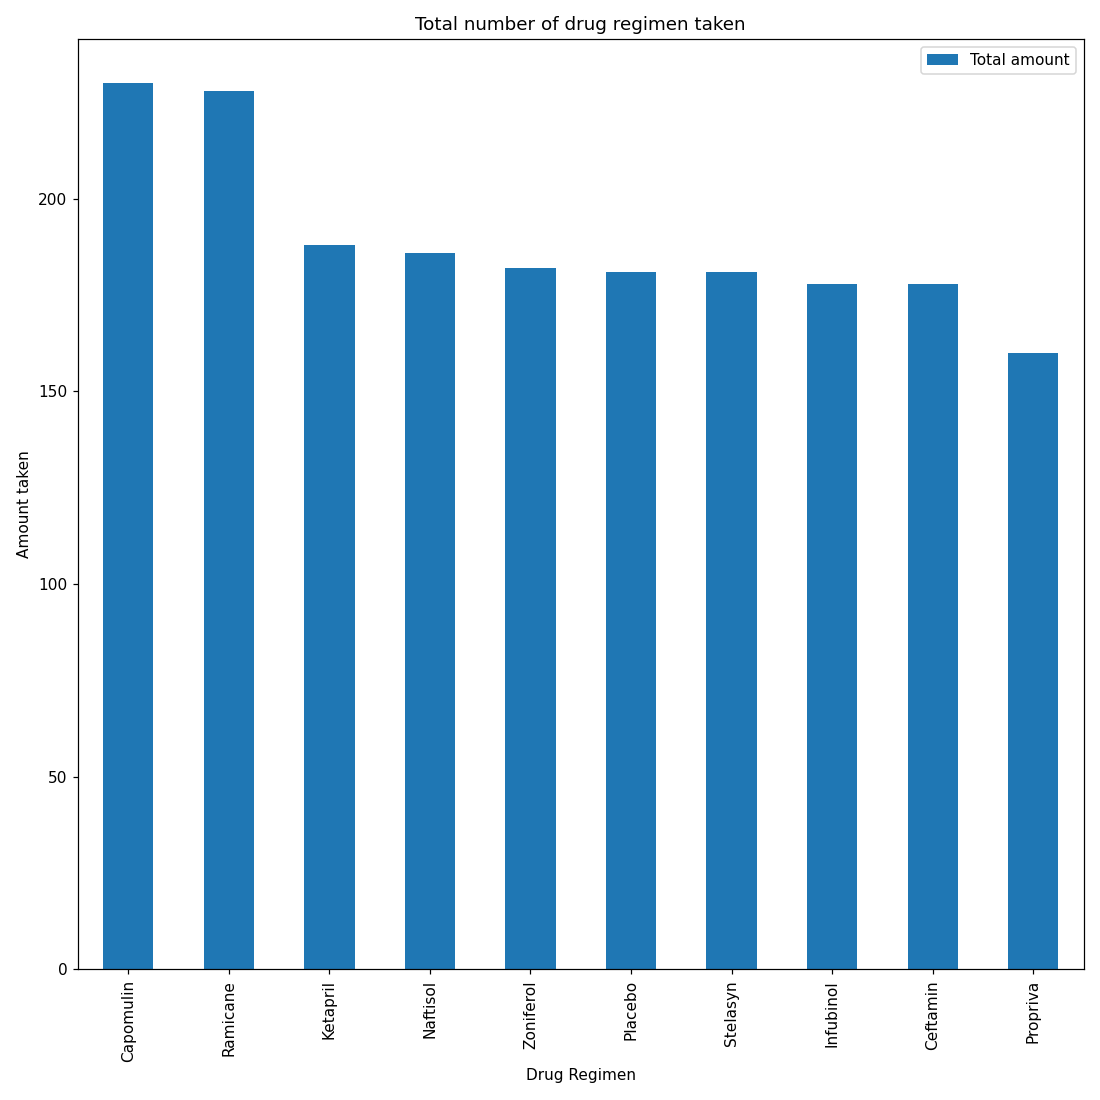

In [86]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
x_axis = clean_data_df["drug_regimen"].unique()
x_axis

y_axis = clean_data_df["drug_regimen"].value_counts()
y_axis
fig, ax = plt.subplots(figsize=(10,10))
panda_bar_df = pd.DataFrame({"drug_regimen":x_axis, "Total amount":y_axis})
panda_bar_df.plot(kind="bar", figsize=(10,10), ax=ax, 
                  title="Total number of drug regimen taken",
                  xlabel="Drug Regimen",
                  ylabel="Amount taken");
fig.tight_layout();

['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     160
Name: drug_regimen, dtype: int64


<IPython.core.display.Javascript object>


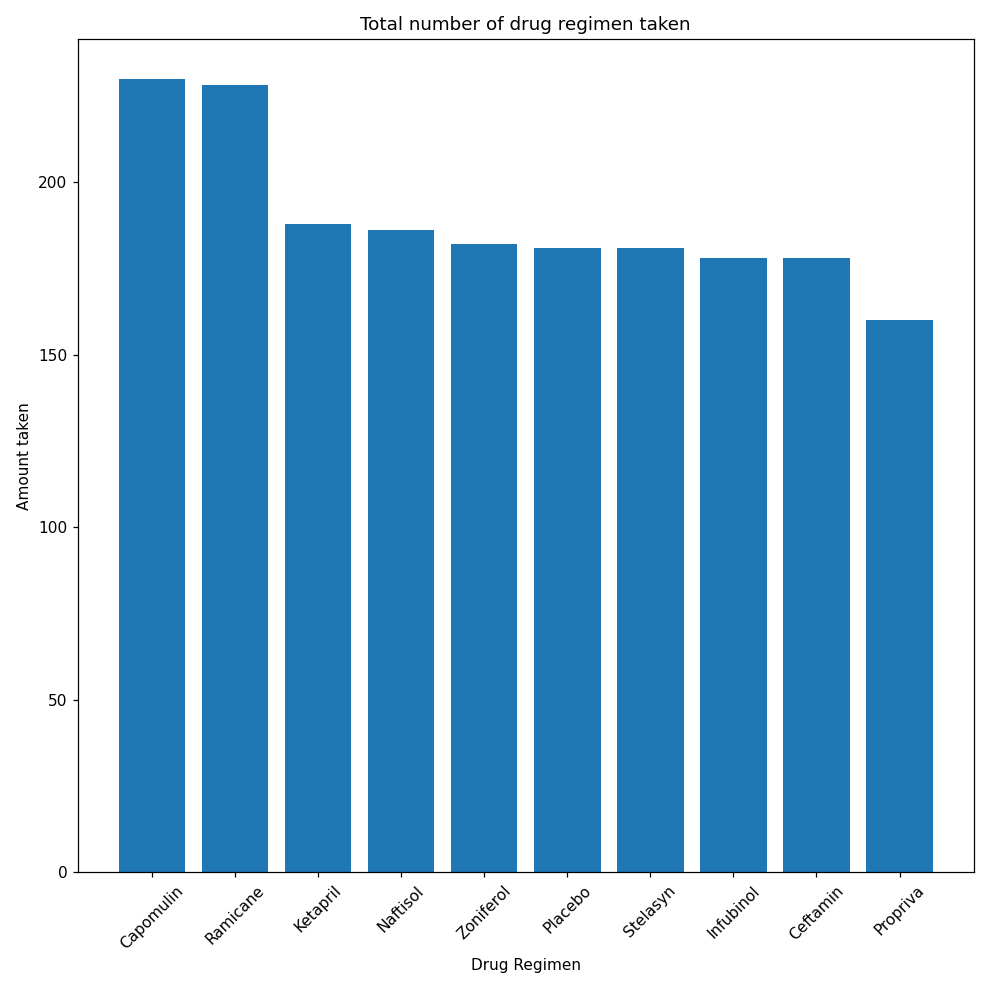

In [87]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = clean_data_df["drug_regimen"].unique()
x_axis
print(x_axis)
y_axis = clean_data_df["drug_regimen"].value_counts()
y_axis
print(y_axis)
fig2, ax2=plt.subplots(figsize=(9,9))
ax2.bar(x_axis, y_axis);
ax2.set_xticks(x_axis);
ax2.set_xticklabels(y_axis.index.values);
ax2.tick_params(axis='x', labelrotation = 45)
ax2.set(title="Total number of drug regimen taken",
      xlabel="Drug Regimen",
      ylabel="Amount taken");
fig2.tight_layout();

<IPython.core.display.Javascript object>


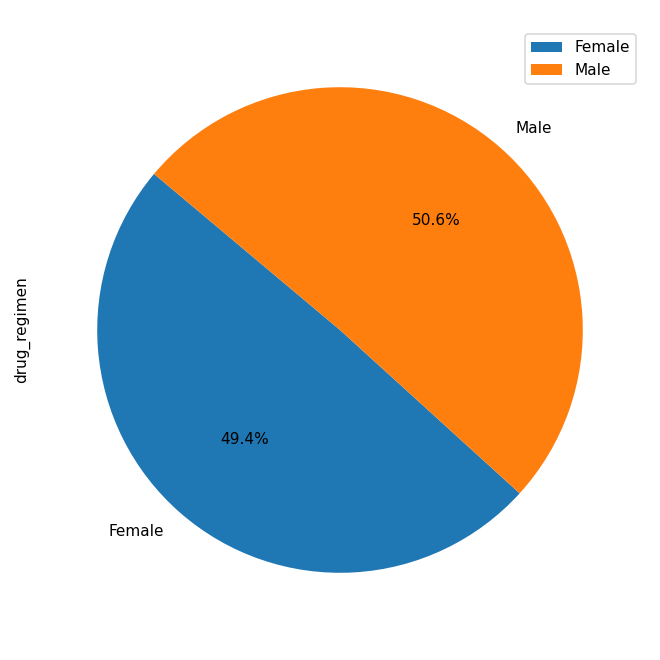

In [88]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
fig3, ax3=plt.subplots(figsize=(6,6))
sex = clean_data_df.groupby("Sex").drug_regimen.count()
panda_pie_df = pd.DataFrame(sex)
panda_pie_df.plot(kind="pie", subplots=True, ax=ax3, figsize=(6,6),autopct="%1.1f%%", startangle=140);
fig3.tight_layout()

<IPython.core.display.Javascript object>


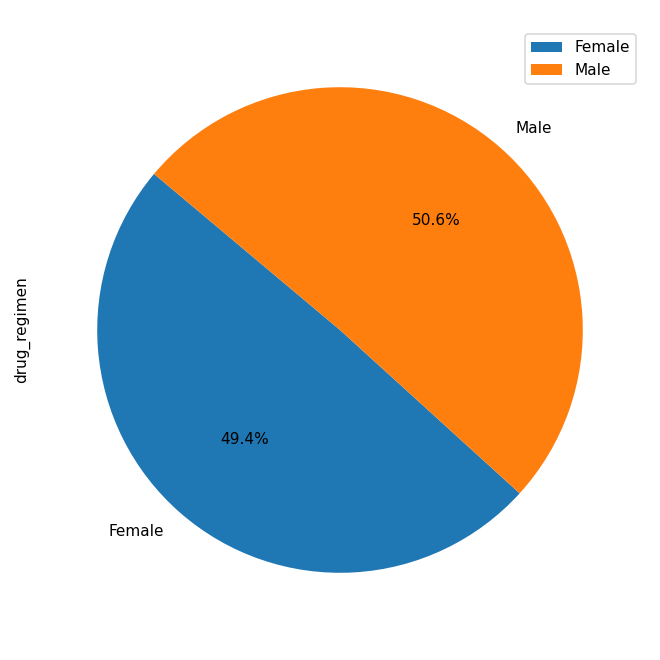

In [90]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = clean_data_df.groupby("Sex").drug_regimen.count()
sex
fig4, ax4 = plt.subplots(figsize=(6,6))
ax4.pie(sex, labels=sex.index.values,
      autopct="%1.1f%%", startangle=140);
ax4.legend();
ax4.set_ylabel("drug_regimen");
fig4.tight_layout()

## Quartiles, Outliers and Boxplots

In [91]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# 


# Start by getting the last (greatest) timepoint for each mouse
timepoint = pd.DataFrame(clean_data_df.groupby("mouse_id").Timepoint.max())
timepoint = timepoint.rename(columns={"Timepoint":"max_timepoint"})
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
clean_data_df = pd.merge(clean_data_df,timepoint, how="outer", on="mouse_id")
clean_data_df

,mouse_id,drug_regimen,Sex,Age_months,Weight (g),Timepoint,tumor_vol_mm3,Metastatic Sites,max_timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1887,z969,Naftisol,Male,9,30,25,63.145652,2,45
1888,z969,Naftisol,Male,9,30,30,65.841013,3,45
1889,z969,Naftisol,Male,9,30,35,69.176246,4,45
1890,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [92]:
# Put treatments into a list for for loop (and later for plot labels)
treatments =["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
final_vol = []
                      
#being for loop to find volume data 
for drug in treatments:
    drugs = clean_data_df.loc[clean_data_df['drug_regimen'] == drug] 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # create new df with max timepoints
    volume_data_df = pd.DataFrame(drugs.loc[drugs['Timepoint'] == drugs['max_timepoint']])
    vol_data = volume_data_df['tumor_vol_mm3']
    # add datat to empty list
    final_vol.append(vol_data)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = vol_data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The interquartile range of {drug} is: {iqr}") 
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print("===============================================")

The upper quartile of Capomulin is: 40.1592203
The lower quartile of Capomulin is: 32.37735684
The interquartile range of Capomulin is: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The upper quartile of Ramicane is: 40.65900627
The lower quartile of Ramicane is: 31.56046955
The interquartile range of Ramicane is: 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
The upper quartile of Infubinol is: 65.52574285
The lower quartile of Infubinol is: 54.04860769
The interquartile range of Infubinol is: 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
The upper quartile of Ceftamin is: 64.29983003
The lower quartile of Ceftamin is: 48.72207785
The interquartile range of Ceftamin is: 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outli

<IPython.core.display.Javascript object>


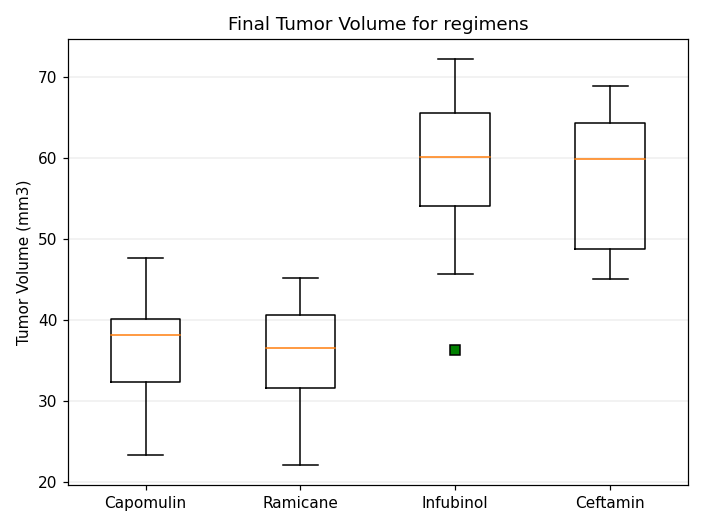

<ipython-input-93-c7ebbb465910>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax5.set_xticklabels(treatments);


In [93]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig5, ax5 = plt.subplots()
ax5.set_title('Final Tumor Volume for regimens');
ax5.set_ylabel('Tumor Volume (mm3)');
ax5.set_xticklabels(treatments);
ax5.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
ax5.boxplot(final_vol, flierprops=dict(markerfacecolor='g', marker='s'))
fig5.tight_layout()

## Line and Scatter Plots

<IPython.core.display.Javascript object>


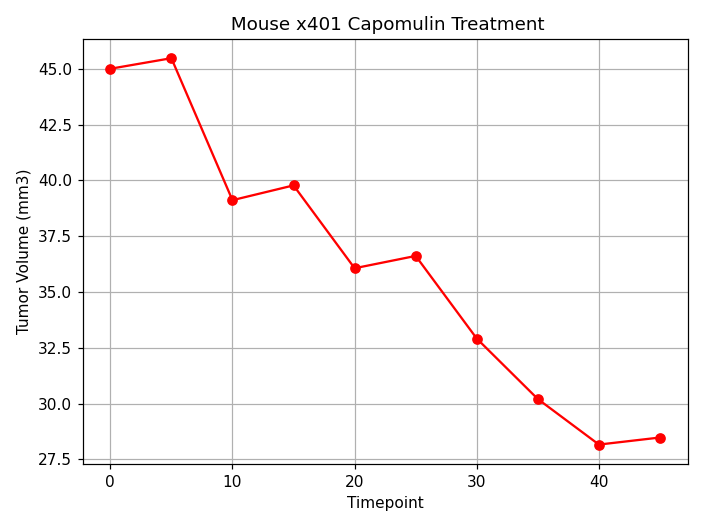

In [94]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# use loc.durg_regimen to locate mouse of choice with this capomulin drug
drugs = clean_data_df.loc[clean_data_df['drug_regimen'] == "Capomulin"] 

# single out mouse of choice 
capomulin = clean_data_df.loc[clean_data_df['mouse_id'] == "x401", :]

# get x axis and y axis
timepoint_xline = capomulin["Timepoint"]
tumor_vol_yline = capomulin["tumor_vol_mm3"]
# create line graph
fig6, ax6= plt.subplots()
ax6.plot(timepoint_xline, tumor_vol_yline, marker = "o", color="red")
ax6.set(title=" Mouse x401 Capomulin Treatment",
      xlabel="Timepoint",
      ylabel="Tumor Volume (mm3)")
ax6.grid(),
fig6.tight_layout()

<IPython.core.display.Javascript object>


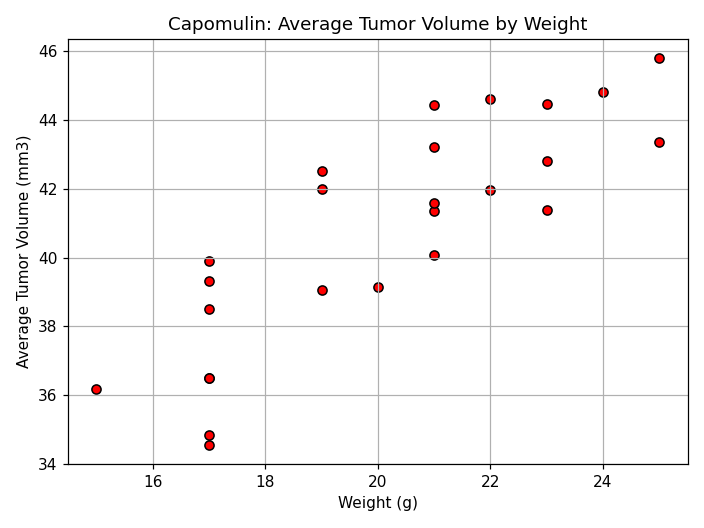

In [95]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
drugs.head()
# obtain avegrage tumor volume
avg_tumor_vol = drugs.groupby("mouse_id").tumor_vol_mm3.mean()
avg_tumor_vol

# create table with neccesary data
avg_tumor_vol_df = pd.DataFrame(clean_data_df[["mouse_id", "Weight (g)",]])
avg_tumor_vol_df = pd.merge(avg_tumor_vol_df, avg_tumor_vol,on="mouse_id")
avg_tumor_vol_df = avg_tumor_vol_df.rename(columns={"tumor_vol_mm3":"average_tumor_vol"})
avg_tumor_vol_df = avg_tumor_vol_df[["mouse_id","average_tumor_vol","Weight (g)"]].drop_duplicates()
avg_tumor_vol_df

# single out x and y axis
x_axis = avg_tumor_vol_df["Weight (g)"]
y_axis =avg_tumor_vol_df["average_tumor_vol"]

fig7, ax7 = plt.subplots()
ax7.scatter(x_axis, y_axis,marker="o",facecolors="red", edgecolors="black")
ax7.grid();
ax7.set(title="Capomulin: Average Tumor Volume by Weight",
       xlabel="Weight (g)",
       ylabel="Average Tumor Volume (mm3)");
fig7.tight_layout()

## Correlation and Regression

In [96]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#show table
avg_tumor_vol_df.head()

,mouse_id,average_tumor_vol,Weight (g)
0,s185,34.559143,17
10,x401,36.182040,15
20,m601,34.847470,17
30,f966,36.505973,17
35,u364,39.887495,17


In [97]:
# Calculate the correlation coefficient and linear regression model 
mous_weight_vol_corr = st.pearsonr(x_axis,y_axis)
mous_weight_vol_corr
print(f"the correlation coefficient between mouse weight and tumor volume is {round(mous_weight_vol_corr[0],2)}")

the correlation coefficient between mouse weight and tumor volume is 0.84


In [98]:
# Calculate the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
regress_line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values

0      37.777635
10     35.868756
20     37.777635
30     37.777635
35     37.777635
45     37.777635
55     37.777635
65     39.686515
75     37.777635
85     40.640954
95     41.595394
105    39.686515
115    39.686515
125    41.595394
135    42.549834
145    41.595394
153    43.504273
163    43.504273
166    41.595394
176    42.549834
186    43.504273
196    41.595394
206    45.413153
216    44.458713
226    45.413153
Name: Weight (g), dtype: float64

<IPython.core.display.Javascript object>


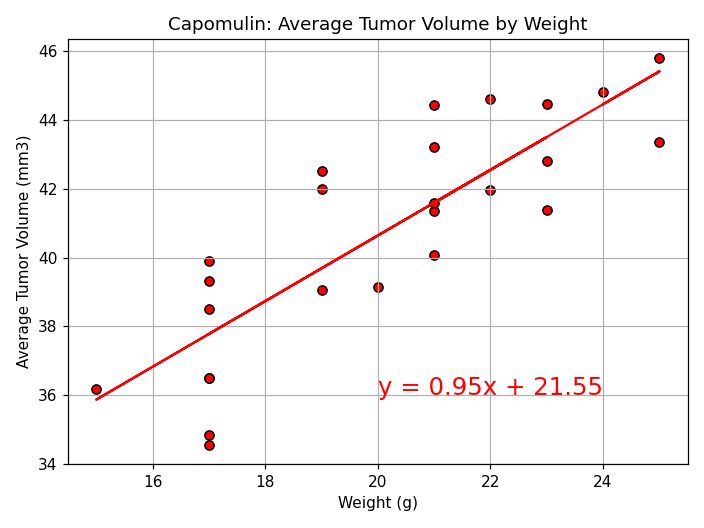

the correlation coefficient between mouse weight and tumor volume is 0.84


In [99]:
# Display scatter plot with regression line
fig8, ax8 = plt.subplots()
ax8.scatter(x_axis, y_axis,marker="o",facecolors="red", edgecolors="black")
ax8.grid();
ax8.set(title="Capomulin: Average Tumor Volume by Weight",
       xlabel="Weight (g)",
       ylabel="Average Tumor Volume (mm3)");
fig8.tight_layout()
ax8.plot(x_axis,regress_values,"r-");
ax8.annotate(regress_line,(20,36),fontsize=16, color="red");
print(f"the correlation coefficient between mouse weight and tumor volume is {round(mous_weight_vol_corr[0],2)}")